# Real estate market analysis

# Real estate market analysis

You have access to data from Yandex Real Estate, an archive of apartment listings in St. Petersburg and neighboring towns over several years. You need to learn how to determine the market value of real estate properties. To do this, conduct a research analysis of the data and establish the parameters that affect the price of properties. This will allow you to build an automated system that will track anomalies and fraudulent activity.  

Two types of data are available for each apartment for sale. The first is entered by the user, and the second is obtained automatically based on cartographic data. For example, the distance to the center, airport, and other objects is automatically obtained from geoservices. The number of parks and water bodies is also filled in without user involvement.

In [1]:
#Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

### 1. Откроем файл с данными и изучим общую информацию

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

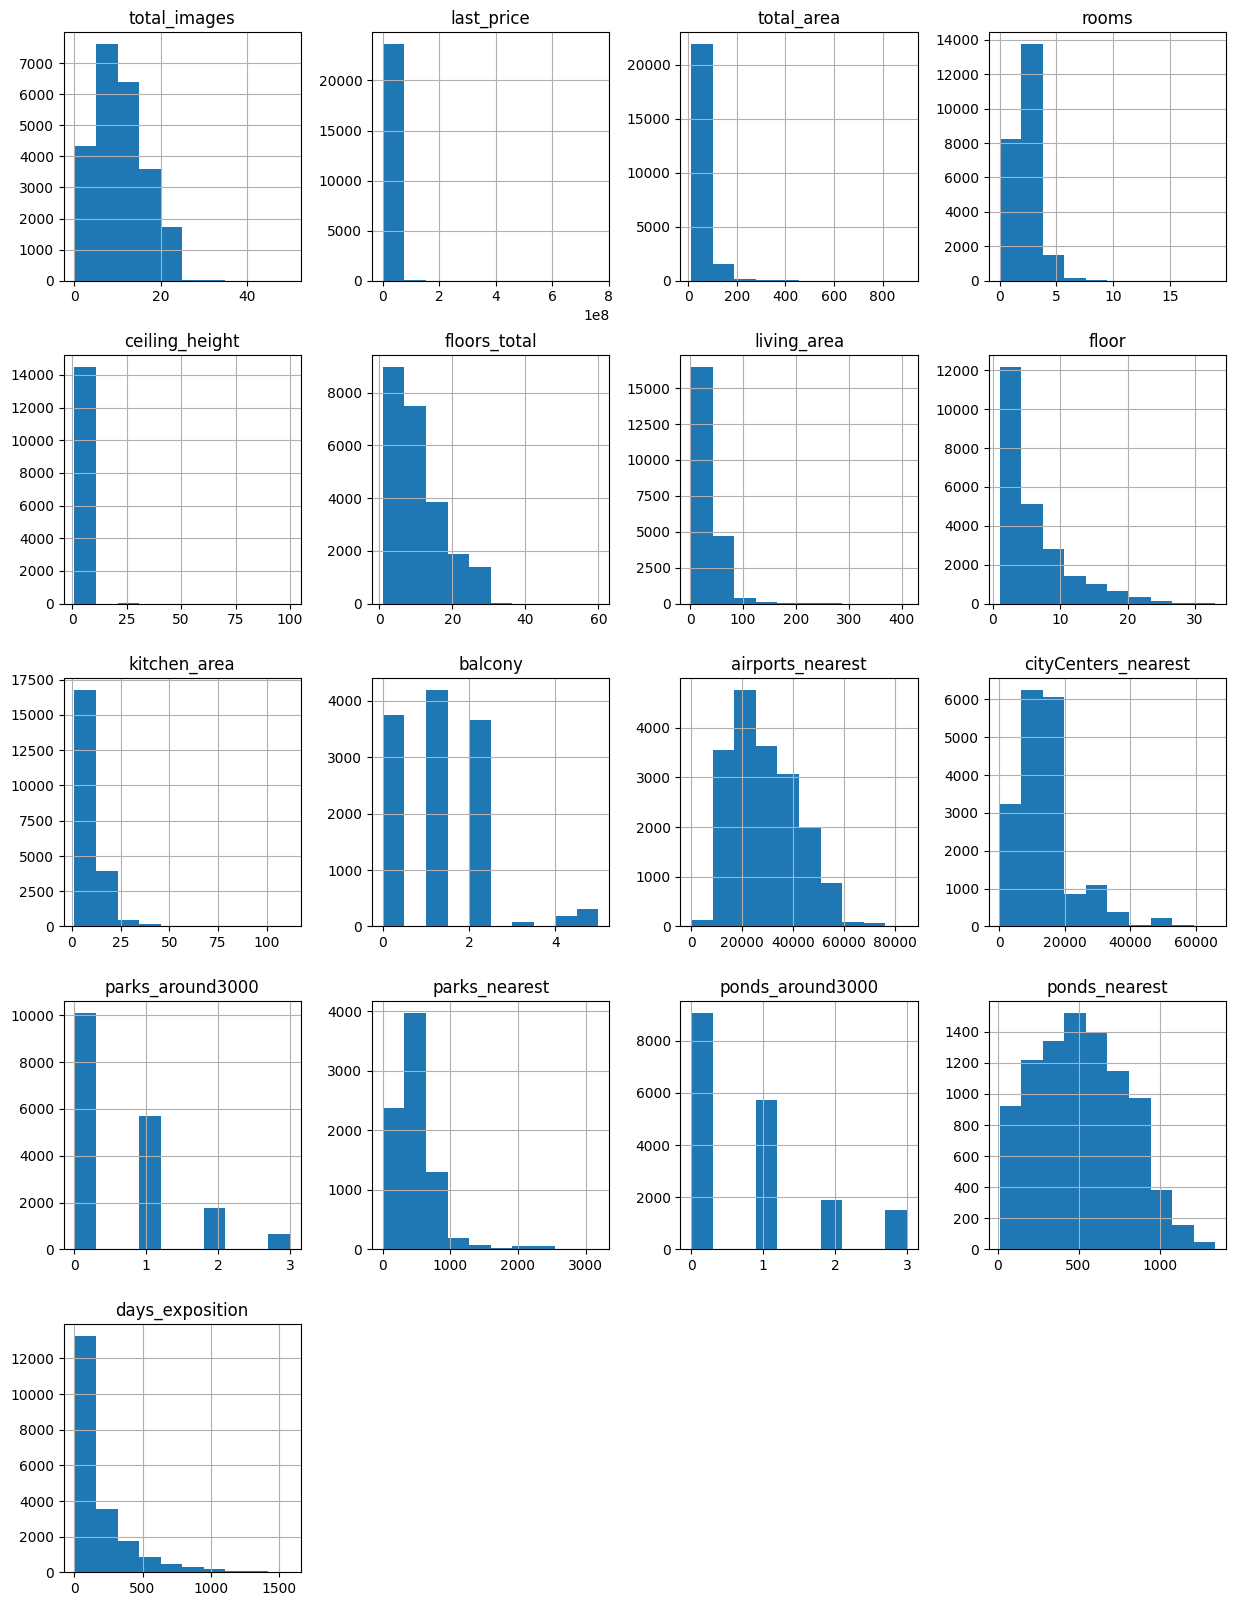

''

In [2]:
#Загрузим датафрейм
try:
    df = pd.read_csv('/Users/darianechaeva/yandex_data_analyst/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Изучим общую информацию о датафрейме    
display(df.head(10))   
df.info()
df.hist(figsize=(15, 20))
plt.show()
;

Далее предстоит работать с датасетом, содержащим порядка 20 тысяч строк. На первом этапе видно, что последние колонки, касающиеся геоданных, имеют большое количество пропусков. Название колонки "cityCenters_nearest" не соответствует правилам "хорошего тона" в написании заголовков. Лучше было бы так city_centers_nearest. Колонки first_day_exposition, balcony и floors_total имеют некорретный тип данных, который необходимо исправить при обработке.   

### 2. Выполним предобработку данных

In [3]:
#количество пропущенных значений для каждого столбца:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# и доля таких пропущенных значений
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [5]:
#изучим содержимое колонки is_apartment для раздела 2.1
df.groupby(by='is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

#### 2.1 Изучим пропуски в данных и их причины

В данных большое количество пропусков, что говорит об их плохом качестве. 

Так, пропуски есть в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, days_exposition.

Исходя из вида гистограмм и графика корреляции данных (ниже), заменим пропуски:
- средним значением в столбцах ceiling_height, 
- в kitchen_area умножим общую площадь в каждой строке на отношение средней площади кухни и средней общей площади. Аналогично поступим с пропусками  в living_area

Кроме того предположим, что пропуски в столбце balcony связаны с отсутствием балконов в квартире, поэтому такие пропуски заменим на 0.

Пропусков  floors_total всего 86, что составляет 0,4% от общего количества строк. Также мало пропусков в locality_name (49). Избавимся от них.

Очень много пропусков в колонках airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000. Эти данные были автоматически получены из геосервисов. Вместо замены пропусков на что-то было бы лучше изучить работу геосервиса для лучшей обработки данных. 

Пропуск в колонке days_exposition скорее всего указывает на то, что объявление о продаже еще висит.

Большое количество пропусков в колонке is_apartment, причем там, где данные имеются, всего 50 со значением True, остальные False. На этом этапе оставим данные без изменений

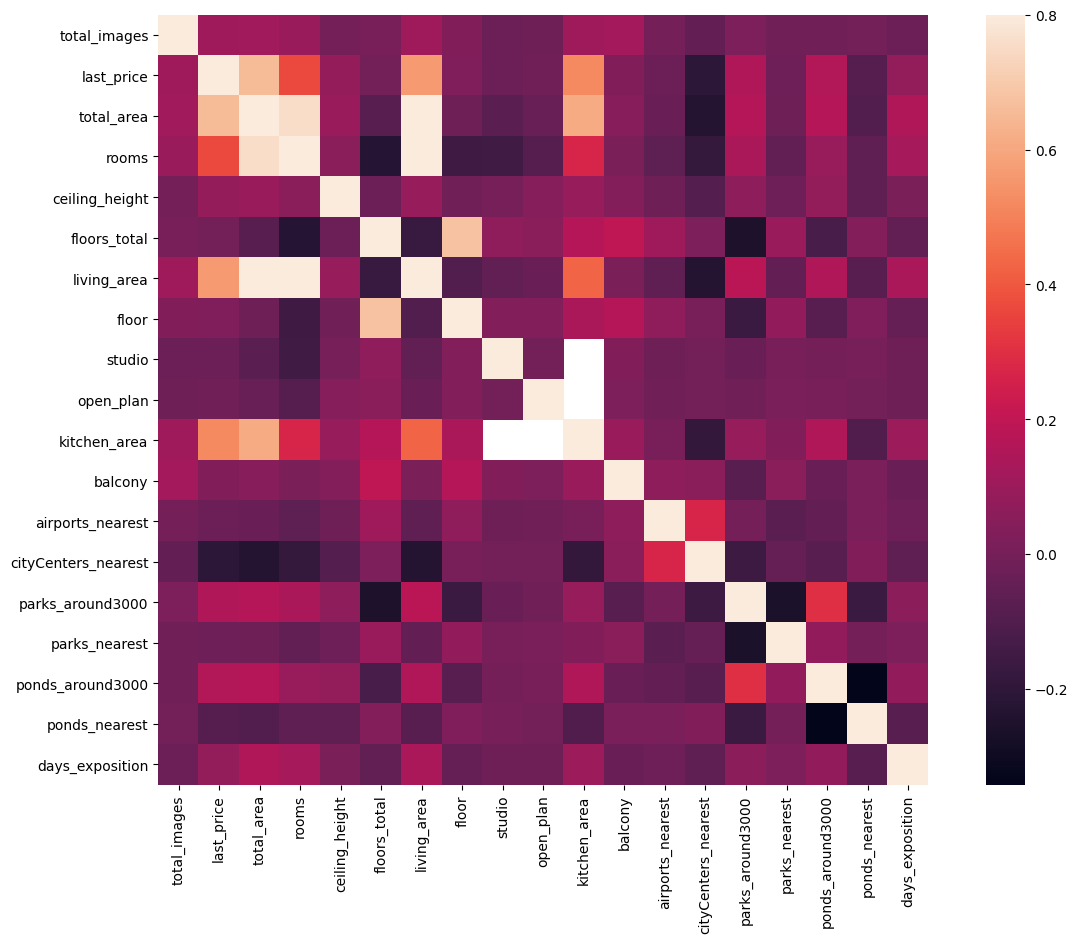

In [6]:
#Чтобы предложить замену пропускам в столбцах, посмотрим, как данные между собой коррелируют 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [7]:
#Заменим пропуски в данных как описано выше

df['balcony'] = df['balcony'].fillna(0)

df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * (df['kitchen_area'].mean() / df['total_area'].mean()))
df['living_area'] = df['living_area'].fillna(df['total_area'] * (df['living_area'].mean() / df['total_area'].mean()))

In [8]:
df = df.dropna(subset=['floors_total', 'locality_name']) #удалим пропуски в столбцах

In [9]:
#Еще раз посмотрим на пропуски после предобработки
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [10]:
# и доля таких пропущенных значений
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,88.300000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [12]:
pd.set_option('display.max_columns', None) #строка, чтобы посмотреть все колонки в таблице
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11312,14,6200000.0,65.2,2018-08-07T00:00:00,3,2.65,9.0,42.7,6,NaN,False,False,10.0,0.0,Санкт-Петербург,27853.0,11676.0,2.0,300.0,1.0,953.0,240.0
3421,8,6580000.0,67.0,2017-02-08T00:00:00,3,2.65,12.0,43.2,11,False,False,False,8.3,2.0,Санкт-Петербург,13721.0,15765.0,0.0,NaN,0.0,NaN,134.0
4270,11,3550000.0,78.0,2018-09-21T00:00:00,3,2.50,5.0,42.0,2,NaN,False,False,9.0,0.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15589,6,3200000.0,32.3,2018-08-04T00:00:00,1,2.50,9.0,17.8,8,NaN,False,False,6.2,0.0,Санкт-Петербург,37652.0,10124.0,0.0,NaN,0.0,NaN,71.0
6610,19,5300000.0,61.0,2018-07-05T00:00:00,2,2.75,16.0,34.0,11,NaN,False,False,14.0,1.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,85.0
8216,3,4500000.0,46.6,2017-07-11T00:00:00,1,2.60,17.0,15.9,1,NaN,False,False,10.8,0.0,Санкт-Петербург,29038.0,11101.0,1.0,551.0,1.0,577.0,153.0
16698,20,7500000.0,81.4,2018-10-10T00:00:00,4,2.50,9.0,62.8,1,NaN,False,False,6.1,0.0,Санкт-Петербург,49687.0,15393.0,0.0,NaN,0.0,NaN,204.0
5766,16,11650000.0,125.8,2018-08-22T00:00:00,4,2.70,5.0,85.0,5,NaN,False,False,16.6,0.0,Санкт-Петербург,21927.0,1900.0,3.0,342.0,2.0,80.0,NaN
9322,10,2600000.0,44.0,2018-07-19T00:00:00,2,2.50,5.0,27.1,4,NaN,False,False,6.0,1.0,Шлиссельбург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23281,20,24800000.0,231.2,2015-01-21T00:00:00,6,3.10,5.0,99.8,4,NaN,False,False,27.4,0.0,Санкт-Петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,NaN


#### 2.2 Изучим тип данных в колонках

Некоторые столбцы имеют некорректный тип данных. Нужно преобразовать:
- first_day_exposition к datetime, так как в этом столбце указаны дата и время размещеия объявления
- balcony и floors_total к integer, так как в квартире и доме могут быть только целочисленные значения числа балконов и этажей

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
#проверим изменения в типе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### 2.3 Удалим неявные дубликаты

In [14]:
#проверим данные на явные дубликаты
df.duplicated().sum()

0

In [15]:
#Изучим уникальные значения в столбце locality_name
print(df['locality_name'].sort_values(ascending=True).unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [16]:
print('Число уникальных названий в колонке locality_name:', len(df['locality_name'].unique()))

Число уникальных названий в колонке locality_name: 364


In [17]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True) #заменим "ё" в названиях на "е"
pattern = r'\b[а-я]+\s?' #создадим регулярное выражение, чтобы избавиться от дубликатов в названиях 
#за счет удаления всех слов перед названием, начинающимся с заглавной буквы
df['locality_name'] = df['locality_name'].str.replace(pattern, '', regex=True)

In [18]:
print('Число уникальных названий в колонке locality_name после преобразований:', len(df['locality_name'].unique()))

Число уникальных названий в колонке locality_name после преобразований: 305


In [19]:
print(df['locality_name'].sort_values(ascending=True).unique()) #датафрейм после удаления неявных дубликатов

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпоселок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 

**2.4 Работа с выбросами**


Из начальных гистограмм видно, что есть объявления с потолками 25-32 метра. Учитывая "среднюю" стоимость такой недвижимости, стоит предположить, что была допущена **ошибка в записи высоты потолков**. Исправим эти значения на среднюю высоту потолков в датафрейме.

In [20]:
 print('Число строк с потолками больше 23 м:', df.query('ceiling_height > 23').shape[0])

Число строк с потолками больше 23 м: 21


In [21]:
#Заменим значения в таких строках средней высотой потолков в датафрейме
df.loc[df['ceiling_height'] >= 23.0, 'ceiling_height'] = df['ceiling_height'].mean()
print('Число строк с потолками больше 23 м:', df.query('ceiling_height > 23').shape[0])

Число строк с потолками больше 23 м: 0


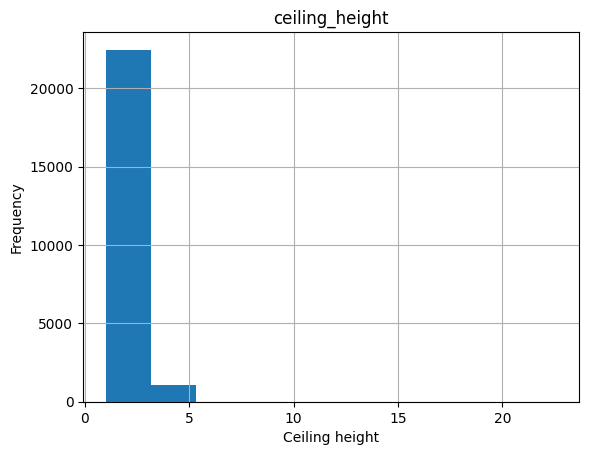

count    23565.000000
mean         2.700117
std          0.302505
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64

In [22]:
df['ceiling_height'].plot(title='ceiling_height', grid=True, kind='hist', bins=10)
plt.xlabel('Ceiling height')
plt.show()
df['ceiling_height'].describe()

In [23]:
display(df.query('ceiling_height > 5'))#изучим данные, выбивающиеся из распределения.
df.query('ceiling_height > 5').shape[0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.500000,7,NaN,False,False,21.100000,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.000000,3,NaN,False,False,63.000000,2,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,227.820886,6,NaN,False,False,69.883137,0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.300000,2,False,False,False,7.300000,0,Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.300000,14,NaN,False,False,8.300000,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5,83.000000,5,NaN,False,False,29.000000,1,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5,28.548983,5,NaN,False,False,8.757285,0,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.400000,5,NaN,False,False,9.100000,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.000000,1,NaN,False,False,8.000000,0,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.000000,2,NaN,False,False,9.457868,1,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


15

При внимательном изучении строк, в которых потолки превышают 5 м, а цена при этом "средняя", логичного объяснения этим данным найти не удается, поэтому удалим строки, в которых высота потолков превышает 6 м. При этом мы потеряем 9 строк.

In [24]:
df = df[df['ceiling_height'] < 6]

In [25]:
print('Число строк после удаления', df['ceiling_height'].count())

Число строк после удаления 23556


Изучим **выбросы для стоимости недвижимости**. Для начала посмотрим на распределение цены в датафрейме:

In [26]:
df['last_price'].describe()

count    2.355600e+04
mean     6.535741e+06
std      1.088833e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.640000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [27]:
print('Число строк с ценой на недвижимость last_price больше 20 млн:', df.query('last_price > 2.0e+7').shape[0])
print('Число строк до удаления:', df['last_price'].count())

Число строк с ценой на недвижимость last_price больше 20 млн: 703
Число строк до удаления: 23556


In [28]:
df = df[df['last_price'] <= 2.0e+7]

# Такой датафрейм не будет содержать строк с ценой в соответствующей колонке больше 20 млн

In [29]:
print('Число строк с ценой на недвижимость last_price больше 20 млн:', df.query('last_price > 2.0e+7').shape[0])
print('Число строк после удаления', df['last_price'].count())

Число строк с ценой на недвижимость last_price больше 20 млн: 0
Число строк после удаления 22853


После удаления строк с ценой более 20 млн, в датафрейме осталось 97% данных. Не критичная потеря.

Гистограмма для total_area выглядит так, словно есть данные сильно отличающиеся от средних. Изучим столбец методом describe и, если необходимо, избавимся от данных

In [30]:
df['total_area'].describe()

count    22853.000000
mean        56.703256
std         24.786265
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        460.800000
Name: total_area, dtype: float64

In [31]:
print('Число строк с общей площадью в total_area больше 200:', df.query('total_area > 200').shape[0])
print('Число строк до удаления:', df['total_area'].count())

Число строк с общей площадью в total_area больше 200: 42
Число строк до удаления: 22853


In [32]:
df = df[df['total_area'] <= 200]

# Такой датафрейм не будет содержать строк с общей площадью в соответствующей колонке больше 200

In [33]:
print('Число строк с общей площадью в total_area больше 200:', df.query('total_area > 200').shape[0])
print('Число строк после удаления:', df['total_area'].count())

Число строк с общей площадью в total_area больше 200: 0
Число строк после удаления: 22811


После удаления этих данных в датафрейме осталось 97% данных.

### 3. Добавим в таблицу новые столбцы

In [34]:
#цена одного квадратного метра 
#как отношение стоимости объекта к его общей площади, округляем до двух знаков после запятой
df['price_per_m'] = round(df['last_price'] / df['total_area'], 2)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79


In [35]:
#день недели публикации объявления (0 — понедельник, 1 — вторник, 2 - среда, 3 - четверг, 4 - пятница);
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

In [36]:
#месяц публикации объявления
#df['exposition_month'] = df['first_day_exposition'].dt.month
df['first_day_exposition'].dt.date # конвертация в формат даты
df['exposition_month'] = df['first_day_exposition'].astype('datetime64[M]')

In [37]:
#год публикации объявления
#df['exposition_year'] = df['first_day_exposition'].dt.year
#df['first_day_exposition'].dt.date # конвертация в формат даты
df['exposition_year'] = df['first_day_exposition'].astype('datetime64[Y]')

In [38]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_category(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass 

In [39]:
df['floor_category'] = df.apply(floor_category, axis=1) #применяем функцию ко всему датафрейму

In [40]:
#расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
df['center_distance_km'] = round(df['cityCenters_nearest'] / 1000)

In [41]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,exposition_weekday,exposition_month,exposition_year,floor_category,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,2019-03-01,2019-01-01,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,2018-12-01,2018-01-01,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,2015-08-01,2015-01-01,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,2018-06-01,2018-01-01,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,NaN,False,False,9.1,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,2018-09-01,2018-01-01,другой,NaN


### 4. Проведите исследовательский анализ данных

**Изучим некоторые параметры объектов и построим отдельные гистограммы для каждого из этих параметров.** 

*Список параметров:*
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

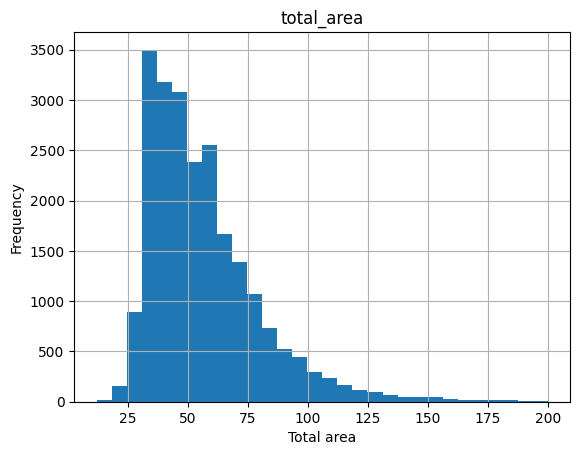

count    22811.000000
mean        56.375286
std         23.522126
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

In [42]:
#гистограмма для общей площади
df['total_area'].plot(title='total_area', grid=True, kind='hist', bins=30)
plt.xlabel('Total area')
plt.show()
df['total_area'].describe()

Основная доля объявлений про недвижимость площадью от 40 до 70 м. Гистограмма имеет длинный хвост справа, который был частично отсечен в процессе обработки выбросов. Большая площадь может быть характерна для загородной недвижимости, частных домов или элитной недвижимости

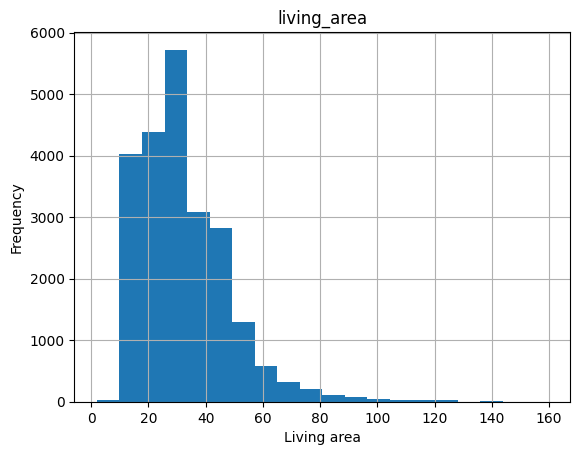

count    22811.000000
mean        32.343091
std         15.840987
min          2.000000
25%         18.800000
50%         30.000000
75%         41.000000
max        159.600000
Name: living_area, dtype: float64

In [43]:
#гистограмма для жилой площади
df['living_area'].plot(title='living_area', grid=True, kind='hist', bins=20)
plt.xlabel('Living area')
plt.show()
df['living_area'].describe()

График имеет пик на 30 м. В исходном датафрейме (до предобработки) максимальная жилая площадь недвижимости в данных - 409 м. Было всего два объявления о продаже такой большой недвижимости, которые, вероятно, относятся к элитной недвижимости или частным домам с участком.

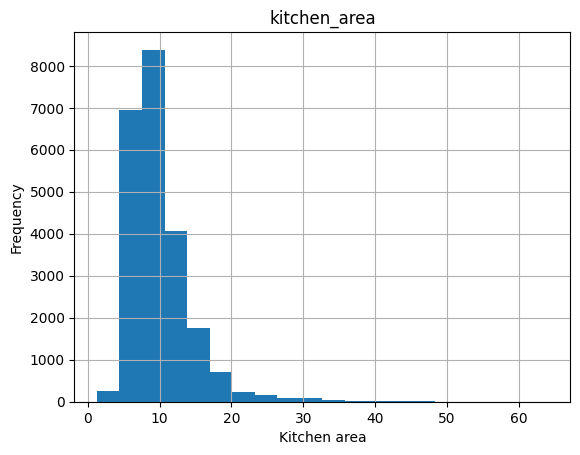

count    22811.000000
mean         9.979674
std          4.619777
min          1.300000
25%          7.000000
50%          9.000000
75%         11.495000
max         64.000000
Name: kitchen_area, dtype: float64

In [44]:
#гистограмма для площади кухни
df['kitchen_area'].plot(title='kitchen_area', grid=True, kind='hist', bins=20)
plt.xlabel('Kitchen area')
plt.show()
df['kitchen_area'].describe()

Большинство объявлений приходится на кухни с площадью 9 метров. Распределение, наряду с распределением жилой и общей площадей, имеет длинный хвост, характерный для недвижимости с очень большой площадью.

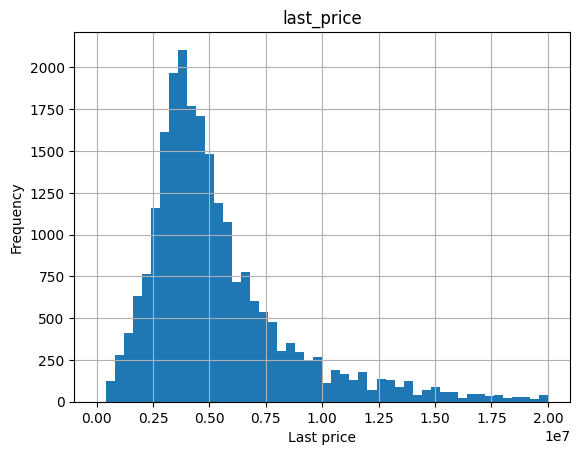

count    2.281100e+04
mean     5.398642e+06
std      3.183191e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

In [45]:
#гистограмма для цены
df['last_price'].plot(title='last_price', grid=True, kind='hist', bins=50)
plt.xlabel('Last price')
plt.show()
df['last_price'].describe()

Большинство объявлений в датасете касаются квартир с ценой продажи 4.6 млн. Объявления с ценой больше 20 млн были отброшены в процессе предобработки

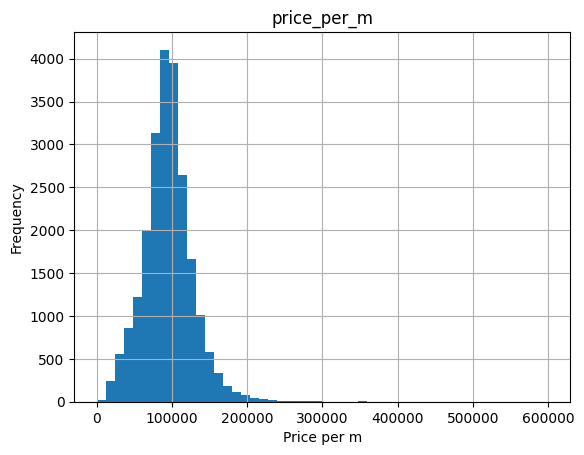

count     22811.000000
mean      94870.207466
std       32827.558417
min         111.830000
25%       75858.385000
50%       94117.650000
75%      112121.210000
max      600000.000000
Name: price_per_m, dtype: float64

In [46]:
#гистограмма для цены за метр
df['price_per_m'].plot(title='price_per_m', grid=True, kind='hist', bins=50)
plt.xlabel('Price per m')
plt.show()
df['price_per_m'].describe()

Гистограмма с распределением цены за квадратный метр указывает, что чаще всего встречается недвижимость с ценой 94000 за метр. Как и в предыдущих распределениях здесь есть часть объявлений с ценой сильно превышающей среднюю.

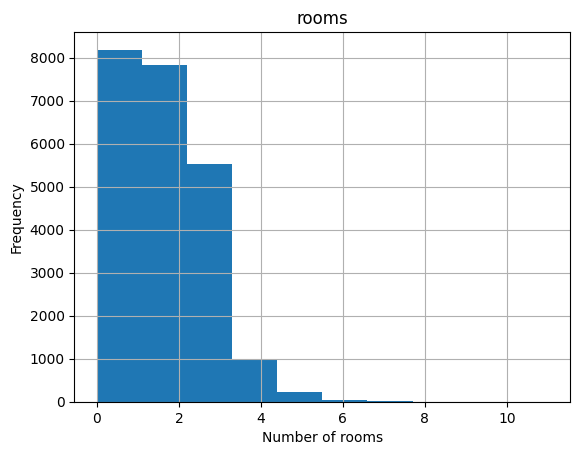

count    22811.000000
mean         2.003419
std          0.970357
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [47]:
#гистограмма для количества комнат
df['rooms'].plot(title='rooms', grid=True, kind='hist', bins=10)
plt.xlabel('Number of rooms')
plt.show()
df['rooms'].describe()

В большинстве объявлений представлена недвижимость с 1-3 комнатами.

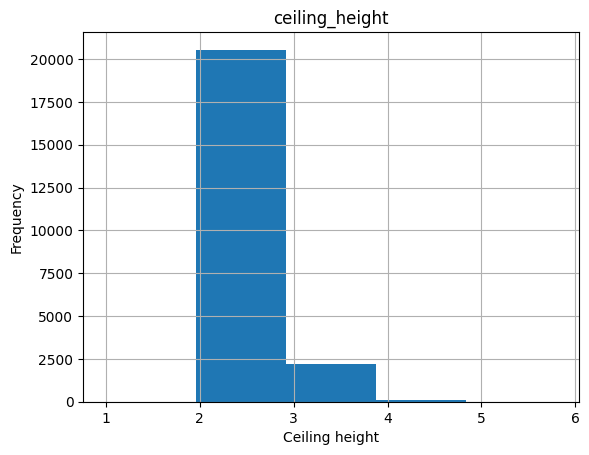

count    22811.000000
mean         2.685952
std          0.201975
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

In [48]:
#гистограмма для высоты потолков
df['ceiling_height'].plot(title='ceiling_height', grid=True, kind='hist', bins=5)
plt.xlabel('Ceiling height')
plt.show()
df['ceiling_height'].describe()

Наиболее характерная высота потолков составляет 2,65 метра, при этом распределение очень узкое - величина межквартильного размаха составляет всего 0,2 м.

count      22811
unique         3
top       другой
freq       16769
Name: floor_category, dtype: object

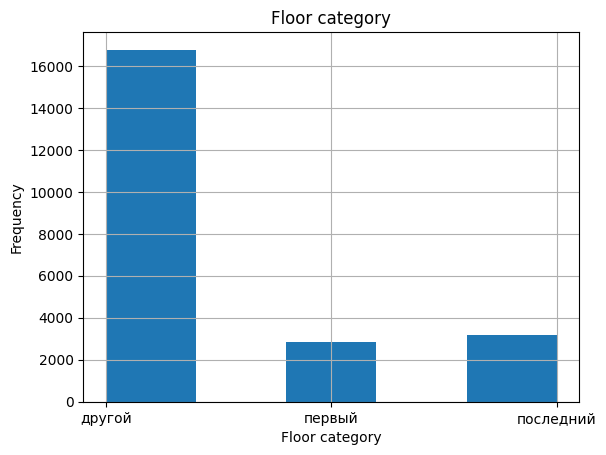

In [74]:
#гистограмма для типа этажа (первый, последний, другой)
df['floor_category'].hist(bins=5)
plt.xlabel('Floor category')
plt.ylabel('Frequency')
plt.title('Floor category')
df['floor_category'].describe()

Чаще всего в объявлениях встречаются квартиры, находящиеся не на первом или последнем этажах.

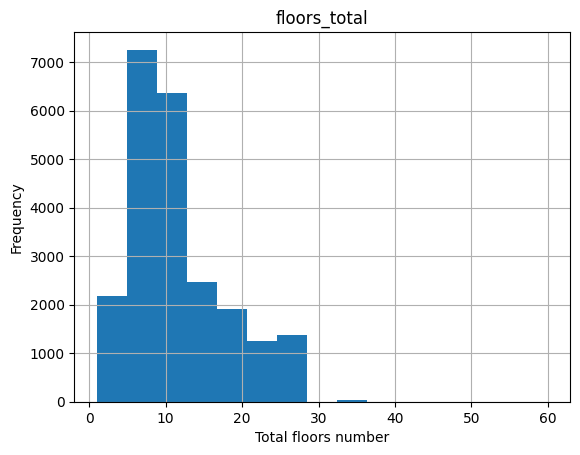

count    22811.000000
mean        10.745693
std          6.631656
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [50]:
#гистограмма для количества этажей в доме
df['floors_total'].plot(title='floors_total', grid=True, kind='hist', bins=15)
plt.xlabel('Total floors number')
plt.show()
df['floors_total'].describe()

Чаще всего в объявлениях фигурирует недвижимость в домах, имеющих не больше 10 этажей. Недвижимость в домах с этажностью больше 30 - редкость (всего 32 объявления).

In [51]:
df.query('floors_total > 30').shape[0] #количесто объектов в домах с этажностью больше 30

32

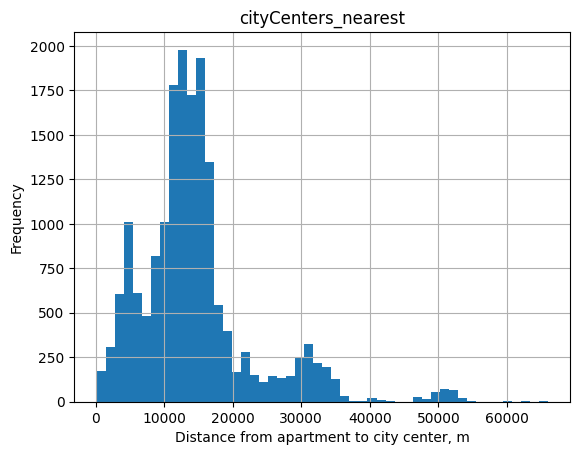

count    17329.000000
mean     14506.347972
std       8579.878794
min        208.000000
25%       9841.000000
50%      13279.000000
75%      16453.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [52]:
#гистограмма расстояния до центра города
df['cityCenters_nearest'].plot(title='cityCenters_nearest', grid=True, kind='hist', bins=50)
plt.xlabel('Distance from apartment to city center, m')
plt.show()
df['cityCenters_nearest'].describe()

Данное распределение имеет четыре пика: на 5 км, 12 км от центра, 30 км и 50 км. Это, вероятнее всего, связано с характером застройки районов в городах. Пики в районе 30км и 50 км - жилая застройка вне Санкт-Петербурга.

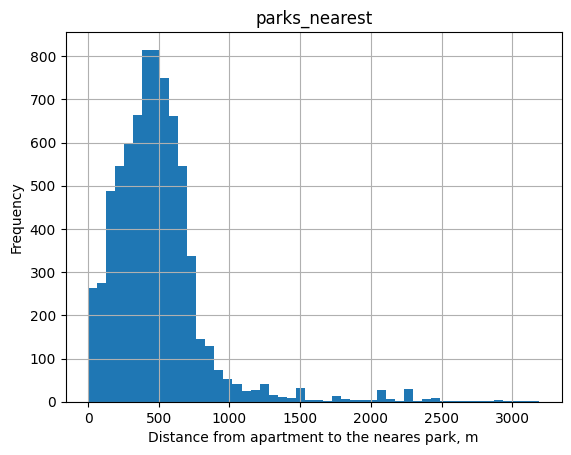

count    7501.000000
mean      493.445274
std       341.202017
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [53]:
#гистограмма расстояния до ближайшего парка
df['parks_nearest'].plot(title='parks_nearest', grid=True, kind='hist', bins=50)
plt.xlabel('Distance from apartment to the neares park, m')
plt.show()
df['parks_nearest'].describe() 

Гистограмма демонстрирует, что в наибольшем числе объявлений о продаже недвижимость находится в 500 м от парка, хотя некоторые объекты находятся и в нескольких километрах.

**Изучим, как быстро продавались квартиры**

Столбец days_exposition показывает, сколько дней было размещено каждое объявление. Построим гистограмму. Посчитаем среднее и медиану.

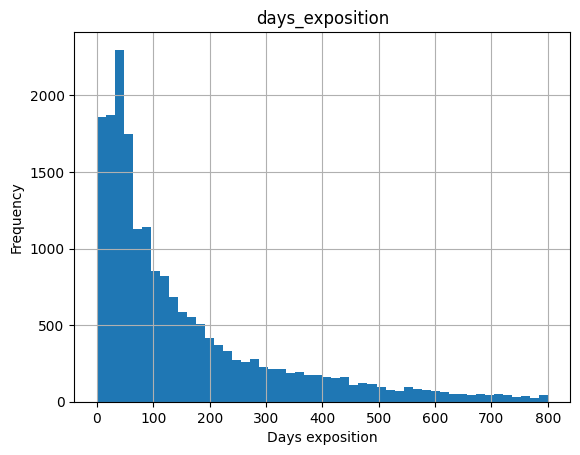

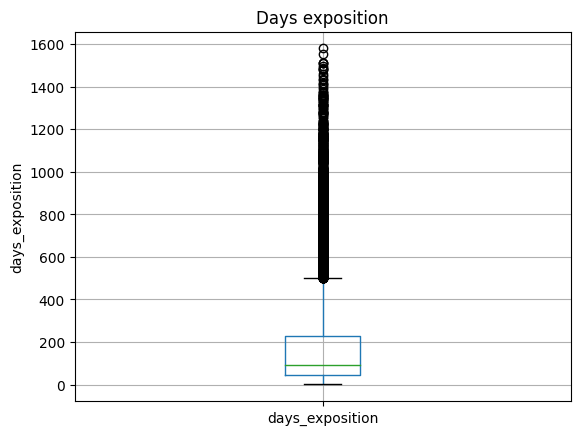

count    19844.000000
mean       177.494608
std        216.156252
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [54]:
#гистограмма для столбца days_exposition
df['days_exposition'].plot(title='days_exposition', range=(0, 800), grid=True, kind='hist', bins=50)
plt.xlabel('Days exposition')
plt.show()
bp = df.boxplot(column=['days_exposition'])
bp.set_title('Days exposition')
bp.set_ylabel('days_exposition')
plt.show()
df['days_exposition'].describe() 

In [55]:
print('Среднее количество дней, которое занимает продажа недвижимости:', round(df['days_exposition'].mean()))
print('Медианное количество дней, которое занимает продажа недвижимости:', round(df['days_exposition'].median()))

Среднее количество дней, которое занимает продажа недвижимости: 177
Медианное количество дней, которое занимает продажа недвижимости: 93


Обычно занимает продажа занимает от 44 до 226 дней. Быстрыми можно считать продажи короче 44 дней (Q1), а необычно долгими те, что продаются более 226 дней (Q3).

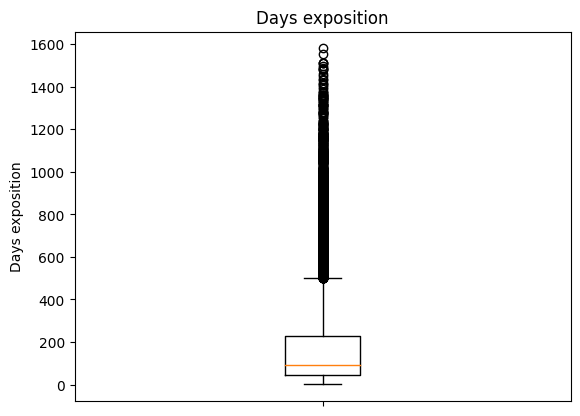

In [56]:
#Код ревьюера

import matplotlib.pyplot as plt

# Создаем фигуру и оси
fig, ax = plt.subplots()

# Строим боксплот
ax.boxplot(df['days_exposition'].dropna())  # Используем dropna() для исключения NaN значений
ax.set_title('Days exposition')
ax.set_ylabel('Days exposition')
ax.set_xticklabels([''])  # Устанавливаем пустые подписи для оси X

plt.show()

**Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта**

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Коэффициент корреляции между величинами, представленными на графике ниже: 0.77


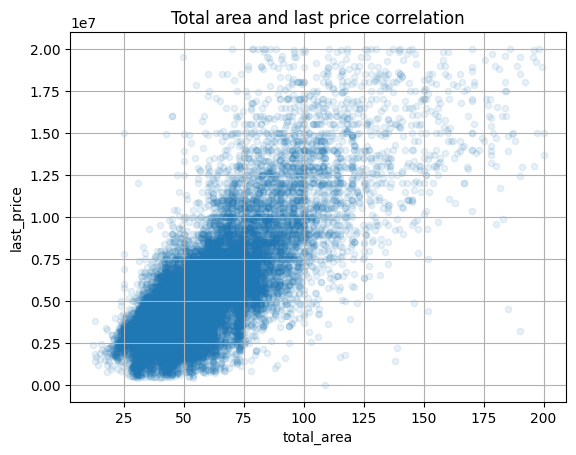

''

In [57]:
print(f"Коэффициент корреляции между величинами, представленными на графике ниже: {round(df['last_price'].corr(df['total_area']), 2)}")
(df.plot(title='Total area and last price correlation', 
         x='total_area', y='last_price', alpha=0.1, kind='scatter', grid=True)
    )
plt.show()
;

Коэффициент корреляции между величинами, представленными на графике ниже: 0.67


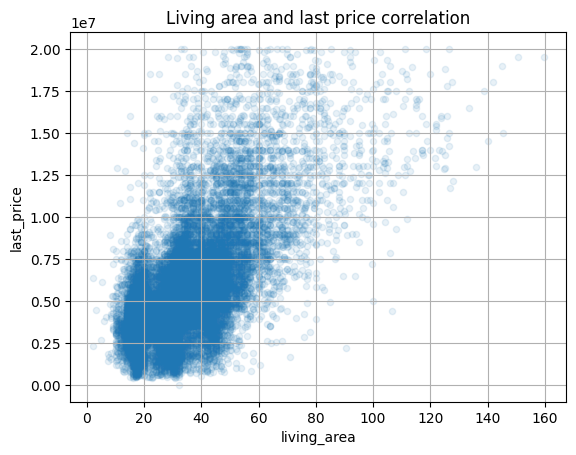

''

In [58]:
print(f"Коэффициент корреляции между величинами, представленными на графике ниже: {round(df['last_price'].corr(df['living_area']), 2)}")
(df.plot(title='Living area and last price correlation', 
         x='living_area', y='last_price', alpha=0.1, kind='scatter', grid=True)
    )
plt.show()
;

Коэффициент корреляции между величинами, представленными на графике ниже: 0.59


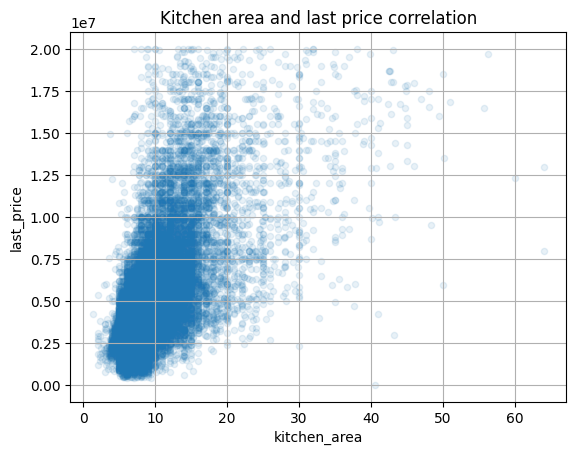

''

In [59]:
print(f"Коэффициент корреляции между величинами, представленными на графике ниже: {round(df['last_price'].corr(df['kitchen_area']), 2)}")
(df.plot(title='Kitchen area and last price correlation', 
         x='kitchen_area', y='last_price', alpha=0.1, kind='scatter', grid=True)
    )
plt.show()
;

Цена зависит от общей площади прямопропорционально (коэффициент корреляции 0,77). На мальньких площадях кухни и маленькой жилой площади можно говорить о некоторой прямопропорциональной зависимости с ценой, но коэффициенты корреляции для жилой площади и площади кухни с ценой недвижимости составляют всего 0,67 и 0,59 соответственно.

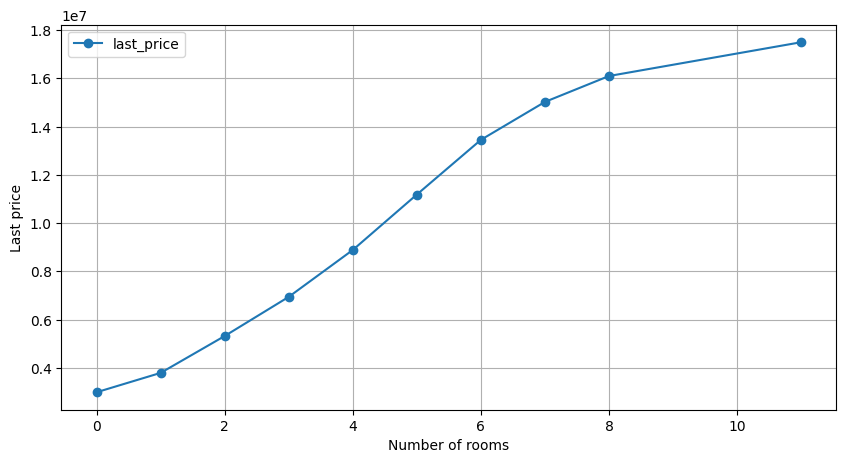

''

In [60]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))
plt.xlabel('Number of rooms')
plt.ylabel('Last price')
plt.show()
;

Цена зависит от количества комнат. Связь прямопропорциональная, однако рост цены замедляется при числе комнат больше 6.

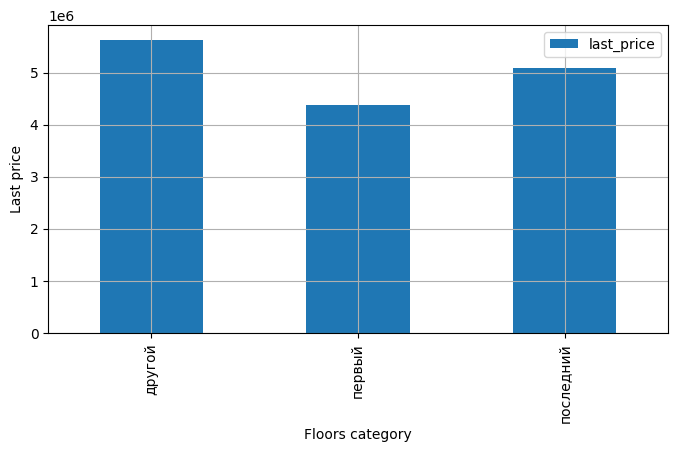

''

In [61]:
df.pivot_table(index='floor_category', values='last_price').plot(kind='bar', grid=True, figsize=(8, 4))
plt.xlabel('Floors category')
plt.ylabel('Last price')
plt.show()
;

Цена на квартиры, расположенные на последнем этаже выше, чем цена на квартиры на первом. Выше всего цена у недвижимости на средних этажах (не первый и не последний).

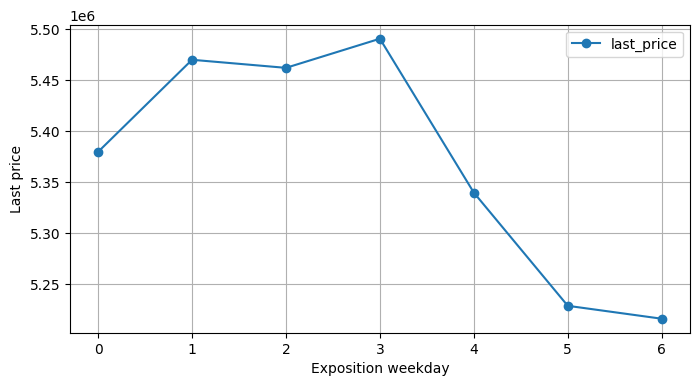

''

In [62]:
df.pivot_table(index='exposition_weekday', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.xlabel('Exposition weekday')
plt.ylabel('Last price')
plt.show()
;

Ниже всего цена была у квартир, размещенных в субботу и воскресенье. Выше цену ставят со вторника по четверг.

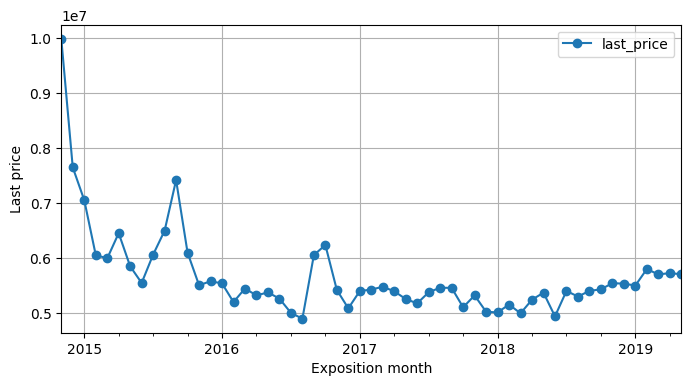

''

In [63]:
df.pivot_table(index='exposition_month', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.xlabel('Exposition month')
plt.ylabel('Last price')
plt.show()
;

Зависимость между месяцем публикации объявления и ценой недвижимости не прослеживается.

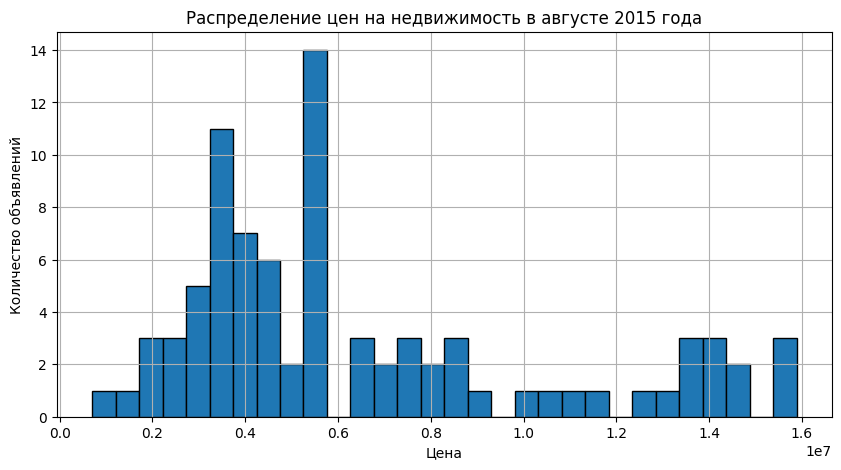

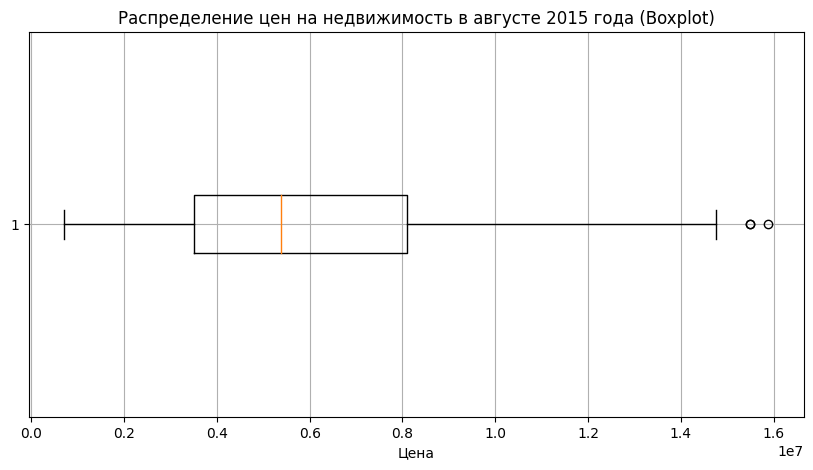

count    8.400000e+01
mean     6.502107e+06
std      3.989616e+06
min      7.000000e+05
25%      3.500000e+06
50%      5.375000e+06
75%      8.087500e+06
max      1.588860e+07
Name: last_price, dtype: float64


In [64]:
# Код ревьюера

import pandas as pd
import matplotlib.pyplot as plt


# Фильтрация данных за август 2015 года с использованием query
specific_month = '2015-08'
df_filtered = df.query('exposition_month.dt.strftime("%Y-%m") == @specific_month')

# Визуализация с использованием гистограммы
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['last_price'], bins=30, edgecolor='k')
plt.title('Распределение цен на недвижимость в августе 2015 года')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.grid(True)
plt.show()

# Визуализация с использованием боксплота
plt.figure(figsize=(10, 5))
plt.boxplot(df_filtered['last_price'], vert=False)
plt.title('Распределение цен на недвижимость в августе 2015 года (Boxplot)')
plt.xlabel('Цена')
plt.grid(True)
plt.show()

# Описательная статистика
print(df_filtered['last_price'].describe())

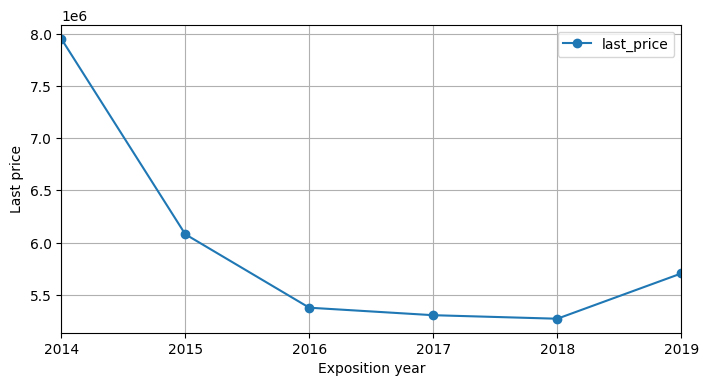

''

In [65]:
df.pivot_table(index='exposition_year', values='last_price').plot(grid=True, style='o-', figsize=(8, 4))
plt.xlabel('Exposition year')
plt.ylabel('Last price')
plt.show()
;

Цена недвижимости варьируется в зависимости от года публикации объявления. Так в период с 2014 по 2018 цена непрерывно снижалась, а в 2019 заметен небольшой рост.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. 

In [66]:
df_median_price = df.pivot_table(index='locality_name', values='price_per_m', aggfunc=['median', 'count'])
#переименуем мультииндексные названия колонок в обычные
df_median_price.columns = ['median_price_per_m', 'count']
df_median_price = df_median_price.query('count > 75').sort_values(by='median_price_per_m', ascending=False)

In [67]:
print('10 населённых пунктов с самой высокой стоимостью квадратного метра:')
display(df_median_price.head(10))

10 населённых пунктов с самой высокой стоимостью квадратного метра:


,median_price_per_m,count
locality_name,,
Санкт-Петербург,103571.430,14925
Пушкин,99706.740,359
Сестрорецк,99678.460,181
Кудрово,95555.315,470
Парголово,91780.225,326
Мурино,86250.375,586
Петергоф,81993.570,199
Кронштадт,81365.295,96
Бугры,81200.000,113


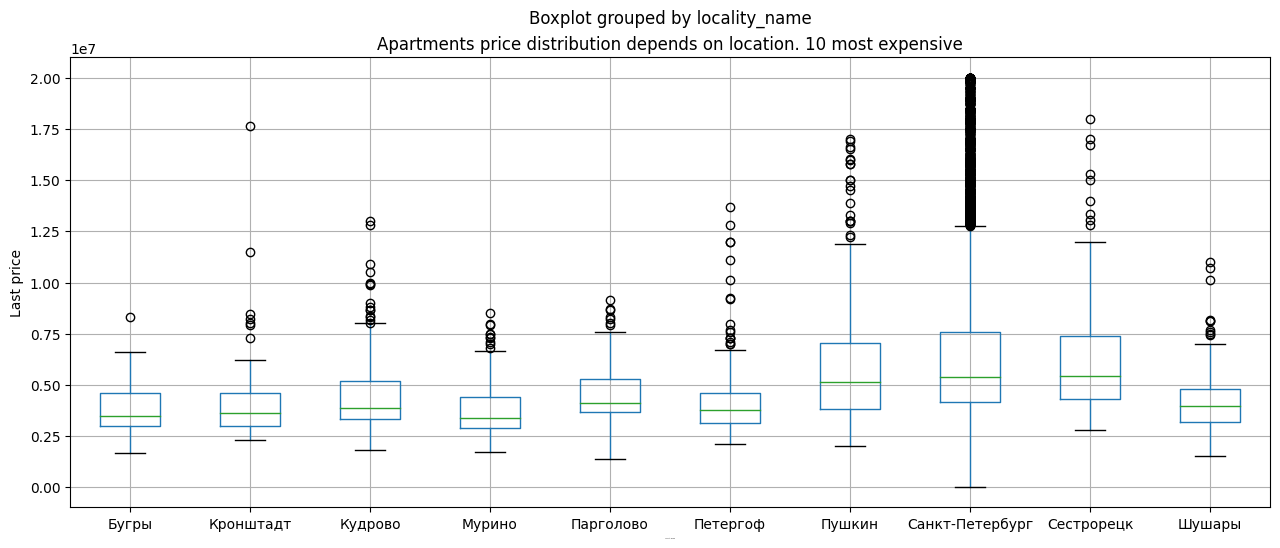

''

In [68]:
(df[df['locality_name'].isin(['Санкт-Петербург', 'Пушкин', 'Сестрорецк', 'Кудрово', 'Парголово', 'Мурино',\
                             'Петергоф', 'Кронштадт', 'Бугры', 'Шушары'])]
     .boxplot(column='last_price',by='locality_name', figsize=(15, 6))
    )
plt.title('Apartments price distribution depends on location. 10 most expensive')
plt.xlabel('Locality name', fontsize=1)
plt.ylabel('Last price') 
plt.show()
;

In [69]:
print('10 населенных пунктов с самой низкой стоимостью квадратного метра:')
display(df_median_price.tail(10))

10 населенных пунктов с самой низкой стоимостью квадратного метра:


,median_price_per_m,count
locality_name,,
Выборг,58158.320,237
Тосно,58016.065,104
Кировск,57884.040,84
Отрадное,57812.500,80
Коммунар,56927.300,89
Никольское,56215.840,94
Кингисепп,46770.835,104
Кириши,37962.960,125
Волхов,35000.000,111


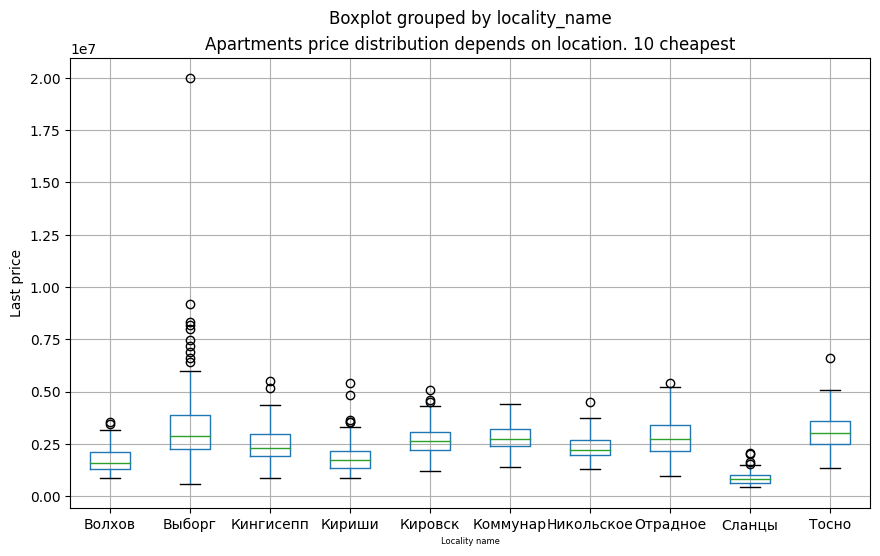

''

In [70]:
(df[df['locality_name'].isin(['Выборг', 'Тосно', 'Кировск', 'Отрадное', 'Коммунар', 'Никольское',\
                             'Кингисепп', 'Кириши', 'Волхов', 'Сланцы'])]
     .boxplot(column='last_price',by='locality_name', figsize=(10, 6))
    )
plt.title('Apartments price distribution depends on location. 10 cheapest')
plt.xlabel('Locality name', fontsize=6)
plt.ylabel('Last price') 
plt.show()
;

Среди населенных пунков с самой дорогой недвижимостью: Санкт-Петербург, Пушкин, Сестрорецк, Кудрово, Парголово. А наименьшая цена недвижимости в населеных пунтах: Сланцы, Волхов, Кириши, Кингисепп и Никольское.

**Выделим среднюю стоимость квартиры в Санкт-Петербурге в зависимости от ее удаления от центра**

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра.

In [71]:
(df.query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='center_distance_km', values='last_price')
    )

,last_price
center_distance_km,
0.0,1.019857e+07
1.0,1.050247e+07
2.0,9.956328e+06
3.0,9.025768e+06
4.0,9.293747e+06
5.0,9.298054e+06
6.0,8.511035e+06
7.0,7.954060e+06
8.0,7.866859e+06


<AxesSubplot:xlabel='center_distance_km'>

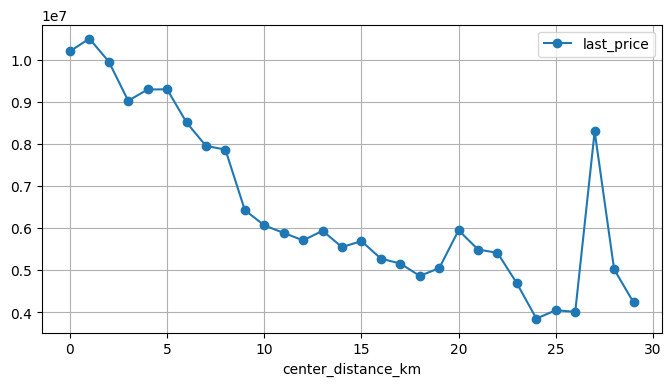

In [72]:
(df.query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='center_distance_km', values='last_price')
     .plot(grid=True, style='o-', figsize=(8, 4))
    )

In [73]:
#display(df.query('center_distance_km == 27')['last_price'])
display(df.query(('last_price != 16912000.0') and ('center_distance_km == 27'))['last_price'].mean()) 
#скколько будет стоить средняя квартира на удалении от центра в 27 км при выбросе очень дорогой квартиры в Пушкине

5298283.168316832

Из графика видно, что цена по мере удаления от центра города падает. При этом наблюдается несколько восходящих трендов, которые могут быть связаны с дорогими городами неподалеку от Санкт-Петербурга. Выбивающееся значение на 27 км связано с очень высокой стоимостью одной из квартир в Пушкине. Если его исключить из расчет среднего, то средняя стоимость квартир на 27 км от центра составит 5300000. 

### 5. Conclusion

**The data obtained from the histograms indicates the following:**

1. The dataset contains a large number of missing values in the columns `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, and `ponds_around3000`. These data were automatically obtained from geoservices. It is recommended to further investigate and improve the geoservice performance to ensure more accurate data collection.

2. During data preprocessing, listings with prices above 20 million were removed. Therefore, the results of this analysis should not be applied to elite or luxury real estate.

3. The majority of listings refer to properties with a total area of 40–70 m² and a living area of around 30 m². The most common kitchen size is 9 m². The average price of such properties is 4.6 million. Listings priced above 20 million were excluded during preprocessing.  
   The histogram of price per square meter shows that the most common value is 94,000 per square meter. As with other histograms, there is a portion of listings with prices significantly higher than the average.

4. Most listings feature properties with 1–3 rooms, ceiling heights of 2.65 meters, and apartments located neither on the first nor the last floor.

5. Most listings are for properties in buildings with no more than 10 floors. Properties in buildings with more than 30 floors are rare (only 32 listings).

6. The histogram of distance to the city center shows four peaks: at 5 km, 12 km, 30 km, and 50 km from the center. This is most likely related to the pattern of urban development in different city areas.

7. The histogram of distance to the nearest park shows that in most listings, the property is located within 500 meters of a park, although some properties are several kilometers away.

**Time required to sell a property:**

8. Property sales usually take between 44 and 226 days. Sales completed in fewer than 44 days (Q1) can be considered fast, while those taking more than 226 days (Q3) are unusually long.

**Property price depends on several factors: total area, number of rooms, floor, listing date, locality, and distance from the city center**

9. Price is directly proportional to total area (correlation coefficient 0.77). For small kitchen areas and living areas, a direct relationship with price can also be observed; however, the correlation coefficients for living area and kitchen area with property price are only 0.67 and 0.59, respectively.

10. Price depends on the number of rooms. The relationship is direct, but price growth slows down when the number of rooms exceeds six.

11. Apartments located on the top floor are priced higher than those on the first floor. The highest prices are observed for apartments located on middle floors (neither first nor last).

12. The lowest prices are observed for listings published on Saturdays and Sundays. Higher prices are typically set from Tuesday to Thursday.

13. No clear relationship is observed between the month of listing publication and property price.

14. Property prices vary depending on the year of listing publication. From 2014 to 2018, prices steadily declined, while a slight increase is observed in 2019.

15. The localities with the highest property prices include Saint Petersburg, Pushkin, Sestroretsk, Kudrovo, and Pargolovo. The lowest property prices are observed in Slantsy, Volkhov, Kirishi, Kingisepp, and Nikolskoye.

16. The chart shows that property prices decrease as distance from the city center increases. At the same time, several upward trends are observed, which may be related to expensive cities located near Saint Petersburg.

